# Compas Analysis

Analaysis of the COMPAS Recidivism Risk Scores.

### Submitted By : Jayalakshmi Vaidyanathan | Prachi Sharma | Sarah Fernandes | Vikita Nayak

## 1. Introduction

COMPAS (Correctional Offender Management Profiling for Alternative Sanctions) is a popular commercial algorithm used by judges and parole officers for scoring criminal defendant’s likelihood of reoffending (recidivism).It has been used to assess more than 1 million offenders since it was developed. This software predicts a defendant’s risk of committing a misdemeanor or felony within 2 years of assessment from 137 features about an individual and the individual’s past criminal record.


#### Data Collection Method

When most defendants are booked in jail, they respond to a COMPAS questionnaire. Their answers are fed into the COMPAS software to generate several scores including predictions of “Risk of Recidivism” and “Risk of Violent Recidivism.”
Through a public records request, ProPublica obtained two years worth of COMPAS scores from the Broward County Sheriff’s Office in Florida
7000 individuals arrested in Broward County, Florida between 2013 and 2014.


Dataset Link: https://www.kaggle.com/danofer/compass#compas-scores-raw.csv


### Load Packages

In [1]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import preprocessing
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import svm
from operator import itemgetter
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
import sklearn as sk

from pandas.tools.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

%matplotlib inline
plt.style.use('ggplot') # emulate R's pretty plotting

# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')
from datetime import date
# print numpy arrays with precision 4
np.set_printoptions(precision=4)

C:\Users\Prach\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Loading the Dataset

At first we select all the fields

In [2]:
df = pd.read_csv('compas-scores-two-years.csv')
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


## 1.1 About the dataset 

###  Distribution of Age of people 

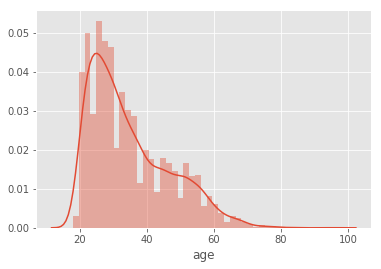

In [4]:
sns.distplot(df.age)

### Distribution of Gender of the people

In [5]:
df_gender = ((df.groupby('sex')['age'].count()/df.sex.count())*100).reset_index()\
    .rename(columns={'age':'Percentage'})
df_gender

,sex,Percentage
0,Female,19.3374
1,Male,80.6626


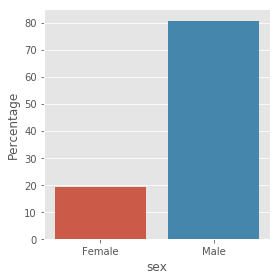

In [7]:
sns.factorplot(x='sex',y='Percentage',data=df_gender,kind='bar')

### Race-wise distribution of Commiting crime

In [18]:
df_race= df[df.is_recid==1].groupby(['race'])['age'].count().sort_values(ascending= False).nlargest(10)

In [19]:
df_race_total= (df.groupby(['race'])['age'].count().sort_values(ascending= False).nlargest(10))

In [20]:
df_race_percent = ((df_race/df_race_total)*100)
df_percent= df_race_percent.nlargest(5).reset_index()\
.rename(columns={'age': 'Race-wise distribution'})
df_percent

,race,Race-wise distribution
0,Native American,61.111111
1,African-American,55.086580
2,Caucasian,41.768541
3,Hispanic,38.461538
4,Other,37.931034


### Graphical representation

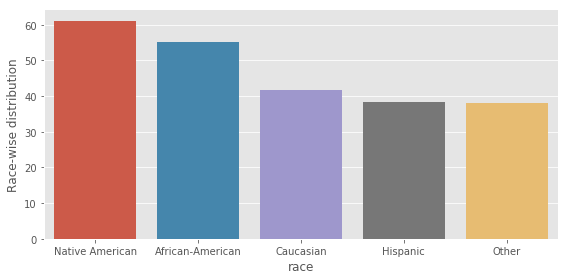

In [21]:
sns.factorplot(x='race', y='Race-wise distribution', data=df_percent, kind='bar', aspect=2)

In [22]:
df_race2= df[df.two_year_recid==1].groupby(['race'])['age'].count().sort_values(ascending= False).nlargest(10)

In [23]:
df_race2_total= (df.groupby(['race'])['age'].count().sort_values(ascending= False).nlargest(10))

In [24]:
df_race2_percent = ((df_race2/df_race2_total)*100)
df_percent= df_race2_percent.nlargest(5).reset_index()\
.rename(columns={'age': 'Race-wise distribution'})
df_percent

,race,Race-wise distribution
0,Native American,55.555556
1,African-American,51.433983
2,Caucasian,39.364303
3,Hispanic,36.420722
4,Other,35.278515


### Graphical analysis on Race 

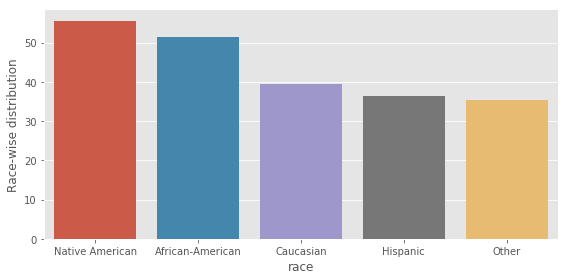

In [26]:
sns.factorplot(x='race', y='Race-wise distribution', data=df_percent, kind='bar', aspect=2)

In [43]:
charge = df['c_charge_desc'].value_counts().head(20)

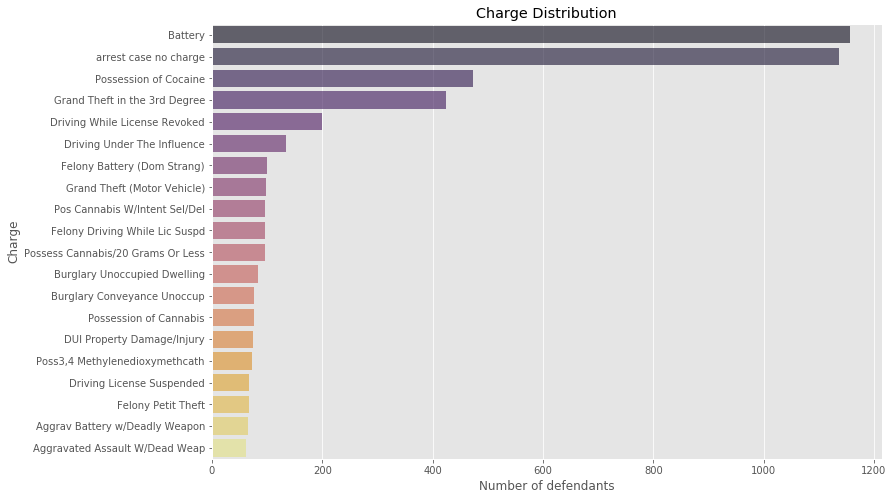

In [45]:
plt.figure(figsize=(12,8))
sns.barplot(y=charge.index, x=charge.values, alpha=0.6,palette='inferno')
plt.title("Charge Distribution")
plt.xlabel("Number of defendants")
plt.ylabel("Charge")
plt.show();

## 2. Data Cleaning

### Extracting Useful Fields

Not all of the rows are useable for the first round of analysis. There are a number of columns that have more than 50% missing data, hence we take them out from analysis. 

In [53]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(df)

,Total,Percent
violent_recid,7214,100.000000
vr_case_number,6395,88.647075
vr_charge_desc,6395,88.647075
vr_charge_degree,6395,88.647075
vr_offense_date,6395,88.647075
c_arrest_date,6077,84.238980
r_days_from_arrest,4898,67.895758
r_jail_in,4898,67.895758
r_jail_out,4898,67.895758
r_charge_desc,3801,52.689215


In [54]:
def missing_data(data):   
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False) 
    record_missing = pd.DataFrame(percent[percent > 50]).reset_index().rename(columns ={'index': 'feature',0: 'missing_fraction'})
    to_drop = list(record_missing['feature'])
    print(to_drop)
    data = data.drop(to_drop, axis = 1)
    return data

new_df = missing_data(df)
new_df.columns

['violent_recid', 'vr_case_number', 'vr_charge_desc', 'vr_charge_degree', 'vr_offense_date', 'c_arrest_date', 'r_days_from_arrest', 'r_jail_in', 'r_jail_out', 'r_charge_desc', 'r_case_number', 'r_offense_date', 'r_charge_degree']


Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_days_from_compas', 'c_charge_degree',
       'c_charge_desc', 'is_recid', 'is_violent_recid', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

Removing insignificant columns like Id, Name and Date related fields 

In [55]:
df = new_df[['sex', 'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score', 'juv_misd_count', 'juv_other_count',
             'priors_count','days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',  'c_days_from_compas', 
             'c_charge_degree', 'c_charge_desc', 'is_recid', 'is_violent_recid', 'type_of_assessment', 'decile_score.1', 
             'score_text', 'v_type_of_assessment', 'v_decile_score', 'v_score_text', 'in_custody', 'out_custody', 
             'priors_count.1', 'start', 'end', 'event', 'two_year_recid']]
df.head()

,sex,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,...,v_type_of_assessment,v_decile_score,v_score_text,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,Male,69,Greater than 45,Other,0,1,0,0,0,-1.0,...,Risk of Violence,1,Low,2014-07-07,2014-07-14,0,0,327,0,0
1,Male,34,25 - 45,African-American,0,3,0,0,0,-1.0,...,Risk of Violence,1,Low,2013-01-26,2013-02-05,0,9,159,1,1
2,Male,24,Less than 25,African-American,0,4,0,1,4,-1.0,...,Risk of Violence,3,Low,2013-06-16,2013-06-16,4,0,63,0,1
3,Male,23,Less than 25,African-American,0,8,1,0,1,NaN,...,Risk of Violence,6,Medium,NaN,NaN,1,0,1174,0,0
4,Male,43,25 - 45,Other,0,1,0,0,2,NaN,...,Risk of Violence,1,Low,NaN,NaN,2,0,1102,0,0


## 3. Data Exploratory Analysis

### 3.1 Distribution of the COMPAS decile scores among whites and blacks.

In [56]:
df_rico =  df[df['race']== 'African-American']

In [57]:
df_rican =  df[df['race'] != 'African-American']

Text(0.5,1,'Black Defendant Decile Score')

Text(0.5,1,'White Defendant Decile Score')

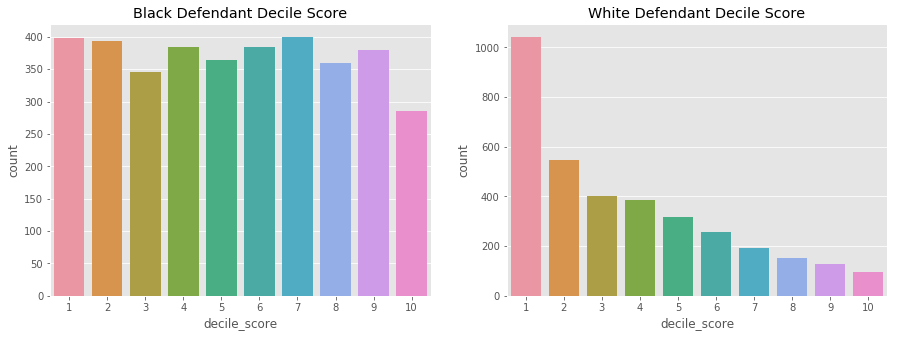

In [58]:
#fig, ax = pyplot.subplots(figsize=a4_dims)
fig, ax =plt.subplots(1,2, figsize=(15,5))
sns.countplot(x='decile_score', data=df_rico, ax=ax[0])
sns.countplot(x='decile_score', data=df_rican, ax=ax[1])
ax[0].set_title('Black Defendant Decile Score')
ax[1].set_title('White Defendant Decile Score')
fig.show()

### Analysis : These histograms show that scores for white defendants were skewed toward lower-risk categories, while black defendants were evenly distributed across scores.

Text(0.5,1,'Black Defendant Violent Decile Score')

Text(0.5,1,'White Defendant Violent Decile Score')

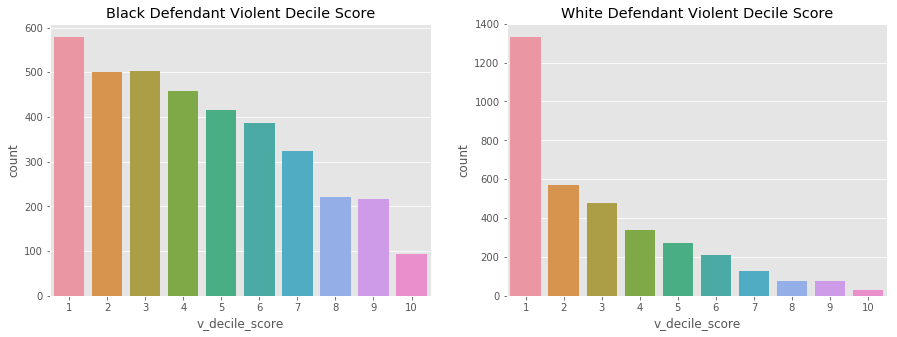

In [59]:
fig, ax =plt.subplots(1,2, figsize=(15,5))
sns.countplot(x='v_decile_score', data=df_rico, ax=ax[0])
sns.countplot(x='v_decile_score', data=df_rican, ax=ax[1])
ax[0].set_title('Black Defendant Violent Decile Score')
ax[1].set_title('White Defendant Violent Decile Score')
fig.show()

### Analysis The histograms for COMPAS’s violent risk score also show a disparity in score distribution between white and black defendants

We can drop 'type_of_assessment' and 'v_type_of_assessment' considering they have only one unique value. This doesn't add much value to our analysis.

### Top Charges commited by African American  

In [60]:
charge_rico = df_rico['c_charge_desc'].value_counts().head(20)

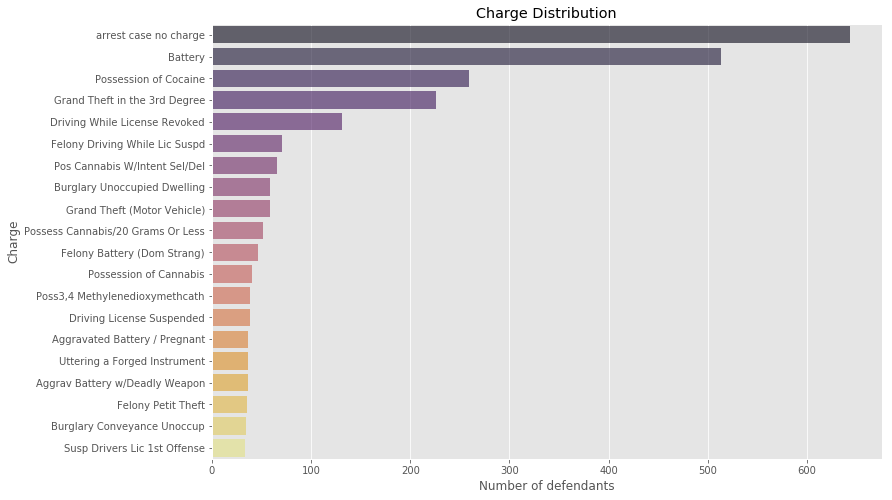

In [61]:
plt.figure(figsize=(12,8))
sns.barplot(y=charge_rico.index, x=charge_rico.values, alpha=0.6,palette='inferno')
plt.title("Charge Distribution")
plt.xlabel("Number of defendants")
plt.ylabel("Charge")
plt.show();

In [68]:
charge_score_rico = df_rico['score_text'].value_counts()

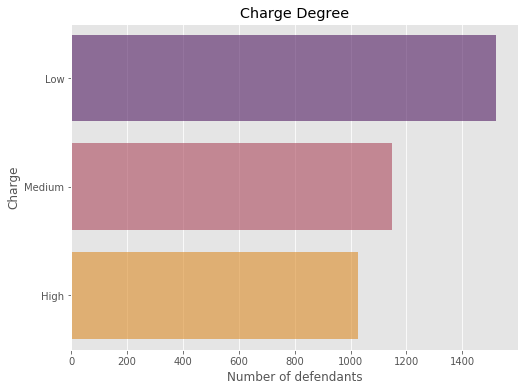

In [71]:
plt.figure(figsize=(8,6))
sns.barplot(y=charge_score_rico.index, x=charge_score_rico.values, alpha=0.6,palette='inferno')
plt.title("Charge Degree")
plt.xlabel("Number of defendants")
plt.ylabel("Charge")
plt.show();

### Top Charges commited by Americans and others

In [64]:
charge_rican = df_rican['c_charge_desc'].value_counts().head(20)

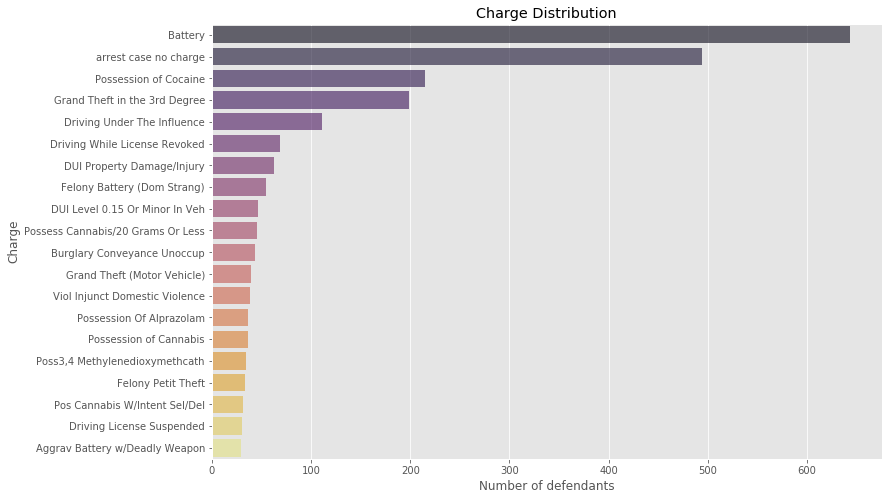

In [65]:
plt.figure(figsize=(12,8))
sns.barplot(y=charge_rican.index, x=charge_rican.values, alpha=0.6,palette='inferno')
plt.title("Charge Distribution")
plt.xlabel("Number of defendants")
plt.ylabel("Charge")
plt.show();

In [72]:
charge_score_rican = df_rican['score_text'].value_counts()

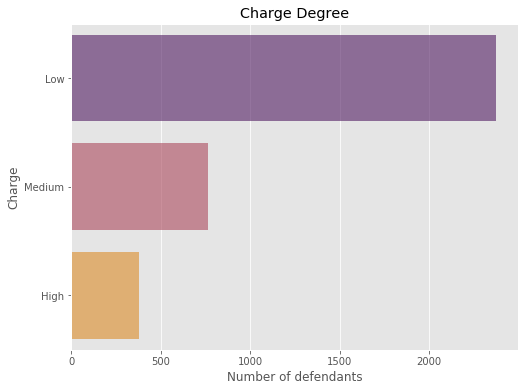

In [73]:
plt.figure(figsize=(8,6))
sns.barplot(y=charge_score_rican.index, x=charge_score_rican.values, alpha=0.6,palette='inferno')
plt.title("Charge Degree")
plt.xlabel("Number of defendants")
plt.ylabel("Charge")
plt.show();

## 4. Featurization of Fields

Binarizing the 'sex' column by assigning 0 if it is Male and 1 if it is Female

In [10]:
df['sex'] = df['sex'].apply(lambda x: 0 if x == 'Male' else 1)

Converting the race categories in to numbers ranging from 0 to 5. For example, assigning 0 to African-American race category

In [11]:
df.race = df.race.apply(lambda x:0 if x == 'African-American'\
                        else 1 if x == 'Caucasian'\
                       else 2 if x == 'Hispanic'\
                       else 3 if x == 'Other'\
                       else 4 if x == 'Asian'\
                       else 5)
                       

Binarizing the 'c_charge_degree' column which can contains two types of values: F and M. We are assigning 0 to F and 1 to M

In [12]:
df['c_charge_degree'] = df['c_charge_degree'].apply(lambda x: 0 if x == 'F' else 1)

The v_score_text column & score_text columns are numerized by assigning 0 to Low, 0.5 to Medium and 1 to High scores.

In [13]:
df['v_score_text'] = df['v_score_text'].apply(lambda x: 0 if x == 'Low' 
                                                          else 0.5 if x == 'Medium'
                                                          else 1)

In [14]:
df['score_text'] = df['score_text'].apply(lambda x: 0 if x == 'Low' 
                                                      else 0.5 if x == 'Medium'
                                                      else 1)

#### Calculated Columns for storing Jail Duration and Custody Duration

Converting the below listed columns in to datetime format

In [15]:
df['c_jail_out'] = pd.to_datetime(df['c_jail_out'])
df['c_jail_in'] = pd.to_datetime(df['c_jail_in'])
df['in_custody'] = pd.to_datetime(df['in_custody'])
df['out_custody'] = pd.to_datetime(df['out_custody'])

Extracting time out of these columns to get jail duration and custody duration to get insights if duration has an impact on the prediction

In [16]:
df['jail_dur'] = df['c_jail_out'].sub(df['c_jail_in'], axis=0).astype('timedelta64[D]')

In [17]:
df['custody_dur'] = df['out_custody'].sub(df['in_custody'], axis=0).astype('timedelta64[D]')

In [18]:
df = df[['age','sex', 'race', 'juv_fel_count', 'decile_score','juv_misd_count', 'juv_other_count', 
         'priors_count', 'days_b_screening_arrest', 'c_days_from_compas', 'c_charge_degree', 'is_recid',
         'is_violent_recid', 'score_text','v_decile_score', 'v_score_text', 'start', 'end', 'event',
         'two_year_recid', 'jail_dur', 'custody_dur']]

Checking for null values

In [19]:
df.isna().sum()

age                          0
sex                          0
race                         0
juv_fel_count                0
decile_score                 0
juv_misd_count               0
juv_other_count              0
priors_count                 0
days_b_screening_arrest    307
c_days_from_compas          22
c_charge_degree              0
is_recid                     0
is_violent_recid             0
score_text                   0
v_decile_score               0
v_score_text                 0
start                        0
end                          0
event                        0
two_year_recid               0
jail_dur                   307
custody_dur                236
dtype: int64

Filling the null values with 0

In [20]:
df.days_b_screening_arrest.fillna(0,inplace=True)

In [21]:
df.c_days_from_compas.fillna(0,inplace=True)

In [22]:
df.jail_dur.fillna(0,inplace=True)

In [23]:
df.custody_dur.fillna(0,inplace=True)

In [24]:
df['length_of_sentence'] = df.end - df.start

In [25]:
df.drop(columns={'start','end'}, inplace=True)

Finally, checking the dataframe on which different machine learning models can be applied

In [26]:
df.columns

Index(['age', 'sex', 'race', 'juv_fel_count', 'decile_score', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'days_b_screening_arrest',
       'c_days_from_compas', 'c_charge_degree', 'is_recid', 'is_violent_recid',
       'score_text', 'v_decile_score', 'v_score_text', 'event',
       'two_year_recid', 'jail_dur', 'custody_dur', 'length_of_sentence'],
      dtype='object')

Finding the co-relation between the features

In [27]:
df.corr()

,age,sex,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,...,is_recid,is_violent_recid,score_text,v_decile_score,v_score_text,event,two_year_recid,jail_dur,custody_dur,length_of_sentence
age,1.000000,0.003215,0.109075,-0.066003,-0.387733,-0.116833,-0.155286,0.142773,-0.043222,0.086342,...,-0.197393,-0.097033,-0.291700,-0.575900,-0.435805,-0.150629,-0.190323,0.014241,-0.008870,0.188034
sex,0.003215,1.000000,0.007934,-0.055385,-0.057860,-0.047637,-0.056384,-0.119556,-0.008110,0.001064,...,-0.099190,-0.059051,-0.058947,-0.121815,-0.110279,-0.073000,-0.092169,-0.056573,-0.043249,0.089927
race,0.109075,0.007934,1.000000,-0.044858,-0.273721,-0.074556,-0.052866,-0.176507,-0.008326,-0.032079,...,-0.123870,-0.045085,-0.242541,-0.227932,-0.184155,-0.095486,-0.116042,-0.049302,-0.052611,0.126716
juv_fel_count,-0.066003,-0.055385,-0.044858,1.000000,0.177758,0.089153,0.047210,0.178519,0.013203,0.002780,...,0.094038,0.055261,0.170299,0.173331,0.173374,0.060358,0.092546,0.062545,0.062618,-0.085029
decile_score,-0.387733,-0.057860,-0.273721,0.177758,1.000000,0.215927,0.183463,0.435350,0.044467,0.030329,...,0.352337,0.171292,0.934729,0.775697,0.672480,0.246873,0.350703,0.208595,0.158111,-0.370776
juv_misd_count,-0.116833,-0.047637,-0.074556,0.089153,0.215927,1.000000,0.272421,0.243671,0.011325,0.007019,...,0.111709,0.089628,0.215926,0.206378,0.196323,0.063382,0.109310,0.045176,0.027541,-0.101517
juv_other_count,-0.155286,-0.056384,-0.052866,0.047210,0.183463,0.272421,1.000000,0.103611,0.006556,0.001715,...,0.109179,0.053514,0.178929,0.202292,0.180226,0.067615,0.108004,0.042473,0.097459,-0.099914
priors_count,0.142773,-0.119556,-0.176507,0.178519,0.435350,0.243671,0.103611,1.000000,0.004512,0.015258,...,0.277780,0.091209,0.413850,0.208674,0.171883,0.193585,0.275117,0.196312,0.126938,-0.289448
days_b_screening_arrest,-0.043222,-0.008110,-0.008326,0.013203,0.044467,0.011325,0.006556,0.004512,1.000000,0.071168,...,0.055685,0.025664,0.034356,0.053573,0.048684,0.036695,0.025038,0.052281,0.025402,-0.038137
c_days_from_compas,0.086342,0.001064,-0.032079,0.002780,0.030329,0.007019,0.001715,0.015258,0.071168,1.000000,...,-0.071868,-0.014343,0.035514,-0.005737,-0.009631,-0.057937,-0.067663,0.024704,0.054680,0.062600


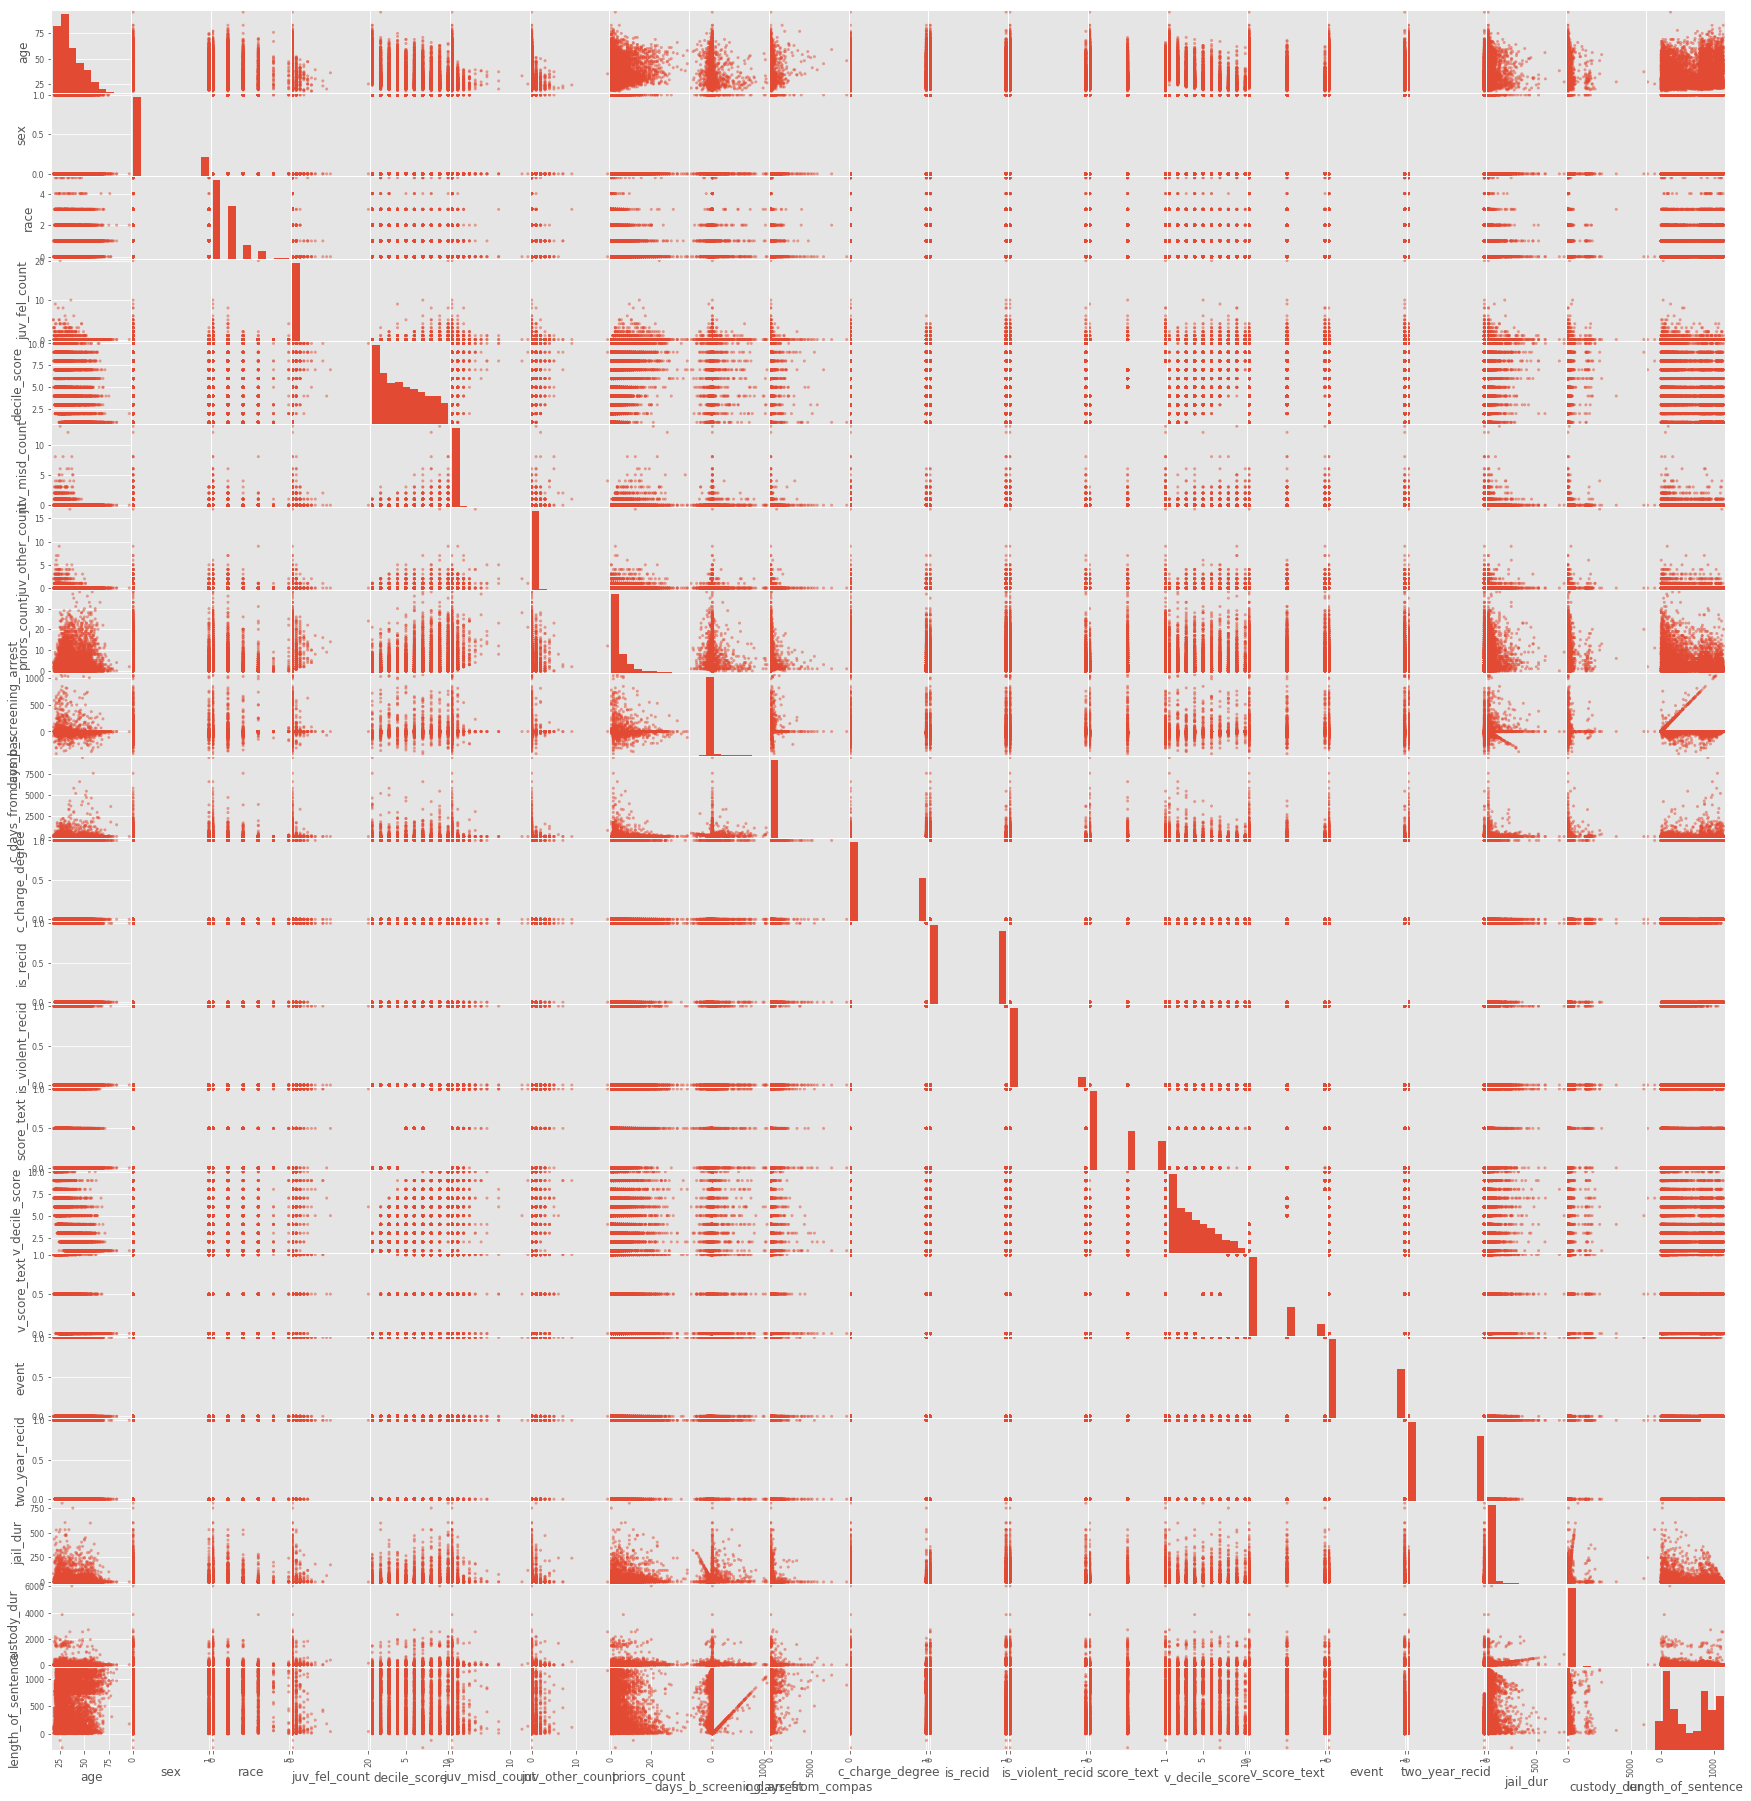

In [28]:
scatter_matrix(df,alpha=0.5, figsize=(30,32));

### Splitting the dataset with all features

In [29]:
df_allfeatures = df

In [30]:
df.columns

Index(['age', 'sex', 'race', 'juv_fel_count', 'decile_score', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'days_b_screening_arrest',
       'c_days_from_compas', 'c_charge_degree', 'is_recid', 'is_violent_recid',
       'score_text', 'v_decile_score', 'v_score_text', 'event',
       'two_year_recid', 'jail_dur', 'custody_dur', 'length_of_sentence'],
      dtype='object')

In [31]:
X = df_allfeatures.drop('two_year_recid',axis=1)

In [32]:
y = df_allfeatures.two_year_recid

In [33]:
Xall_train, Xall_test, yall_train, yall_test = train_test_split(X,y, test_size=0.2,random_state=42)

###  Dataset with 10 features

In [34]:
Xten_train = Xall_train[['is_recid', 'length_of_sentence', 'event', 'is_violent_recid',
       'decile_score', 'score_text', 'priors_count', 'custody_dur',
       'v_decile_score','age']]
Xten_test = Xall_test[['is_recid', 'length_of_sentence', 'event', 'is_violent_recid',
       'decile_score', 'score_text', 'priors_count', 'custody_dur',
       'v_decile_score','age']]

In [35]:
yten_train = yall_train
yten_test = yall_test

## 5. Applying Machine Learning Models  to predict if they will recommite the crime 

### 5.1.a Logistic Regression 

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
#Fitting the model
LogReg = LogisticRegression()
LogReg.fit(Xall_train, yall_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
#Predicting y values
pred_label = LogReg.predict(Xall_test)

In [39]:
from sklearn.metrics import confusion_matrix

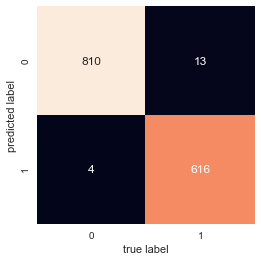

In [40]:
#Construct confusion matrix
confusion_m = confusion_matrix(yall_test, pred_label)
sns.set()
mat = confusion_matrix(yall_test, pred_label)
sns.heatmap(mat,square=True, annot=True,fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [41]:
# Accuracy Of Prediction
print("Accuracy:" + str(LogReg.score(Xall_test, yall_test)))

Accuracy:0.988218988219


In [42]:
y_test_probability_predictions = LogReg.predict_proba(Xall_test)[:, 1]

In [43]:
# Cross validation score of Prediction
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc_score1 = roc_auc_score(yall_test,pred_label)
print("ROC AUC: {0}".format(roc_auc_score1))
false_positive_rate, true_positive_rate, threshold = roc_curve(yall_test, y_test_probability_predictions)

ROC AUC: 0.9888762591619958


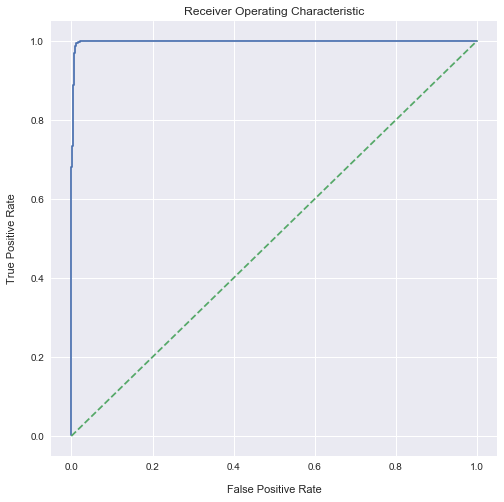

In [44]:
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.title('Receiver Operating Characteristic')
plt.ylabel('True Positive Rate', labelpad=13)
plt.xlabel('False Positive Rate', labelpad=13);

### Logistics regression on best 10 features

In [45]:
#Fitting the model
LogReg = LogisticRegression()
LogReg.fit(Xten_train, yten_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
#Predicting y values
pred_label = LogReg.predict(Xten_test)

In [47]:
from sklearn.metrics import confusion_matrix

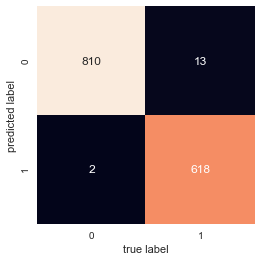

In [48]:
#Contruct confusion matrix
confusion_m = confusion_matrix(yten_test, pred_label)
sns.set()
mat = confusion_matrix(yten_test, pred_label)
sns.heatmap(mat,square=True, annot=True,fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [49]:
# Accuracy Of Prediction
print("Accuracy:" + str(LogReg.score(Xten_test, yten_test)))

Accuracy:0.989604989605


In [50]:
# Cross validation score of Prediction
from sklearn.metrics import roc_auc_score
roc_auc_score1 = roc_auc_score(yten_test,pred_label)
print("ROC AUC: {0}".format(roc_auc_score1))

ROC AUC: 0.9904891623878024


### Naive Bayes 

In [51]:
from sklearn import naive_bayes as naive_b

In [52]:
#Fitting the model
naive_b = GaussianNB()
naive_b.fit(Xall_train,yall_train)

GaussianNB(priors=None)

In [53]:
#Predicting y values
pred_label = naive_b.predict(Xall_test)

In [54]:
from sklearn.metrics import confusion_matrix

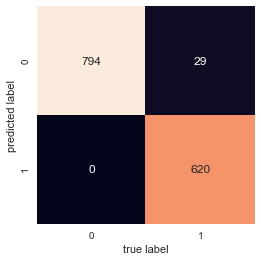

In [55]:
#Construct confusion matrix
confusion_m = confusion_matrix(yall_test, pred_label)
sns.set()
mat = confusion_matrix(yall_test, pred_label)
sns.heatmap(mat,square=True, annot=True,fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [56]:
# Accuracy Of Prediction
print("Accuracy:" + str(naive_b.score(Xall_test, yall_test)))

Accuracy:0.979902979903


In [57]:
# Cross validation score of Prediction
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score
roc_auc_score1 = roc_auc_score(yall_test,pred_label)
print("ROC AUC: {0}".format(roc_auc_score1))

ROC AUC: 0.9823815309842041


### Naive bayes on best 10 features

In [58]:
#Fitting the model
naive_b = GaussianNB()
naive_b.fit(Xten_train,yten_train)

GaussianNB(priors=None)

In [59]:
#Predicting y values
pred_label = naive_b.predict(Xten_test)

In [60]:
from sklearn.metrics import confusion_matrix

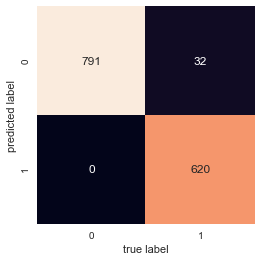

In [61]:
#Construct confusion matrix
confusion_m = confusion_matrix(yten_test, pred_label)
sns.set()
mat = confusion_matrix(yten_test, pred_label)
sns.heatmap(mat,square=True, annot=True,fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [62]:
# Accuracy Of Prediction
print("Accuracy:" + str(naive_b.score(Xten_test, yten_test)))

Accuracy:0.977823977824


In [63]:
# Cross validation score of Prediction
from sklearn.metrics import roc_auc_score
roc_auc_score1 = roc_auc_score(yten_test,pred_label)
print("ROC AUC: {0}".format(roc_auc_score1))

ROC AUC: 0.9805589307411908


### SVM Classifier Linear

In [64]:
#Fitting the model
model_svm = svm.SVC(kernel='linear')
model_svm.fit(Xall_train, yall_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [65]:
# predicting y values
y_pred = model_svm.predict(Xall_test)

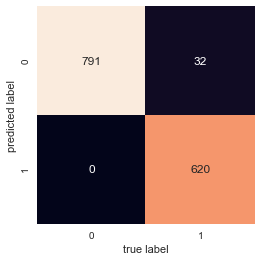

In [66]:
#Construct confusion matrix
confusion_m = confusion_matrix(yten_test, pred_label)
sns.set()
mat = confusion_matrix(yten_test, pred_label)
sns.heatmap(mat,square=True, annot=True,fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [67]:
# Accuracy Of Prediction
print("Accuracy:" + str(accuracy_score(yall_test,y_pred)))

Accuracy:0.988911988912


In [68]:
# Cross validation score of Prediction
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(yall_test, y_pred)
print("ROC AUC: {0}".format(roc_auc_score))

ROC AUC: 0.9896827107748991


### SVM RBF

In [131]:
#Fitting the model
model_svm = svm.SVC(kernel='rbf')
model_svm.fit(Xall_train, yall_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [132]:
# predicting y values
y_pred = model_svm.predict(Xall_test)

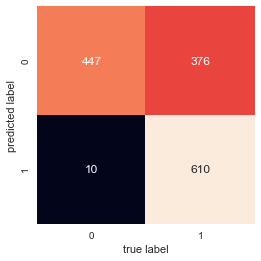

In [133]:
#Construct confusion matrix
confusion_m = confusion_matrix(yten_test, y_pred)
sns.set()
mat = confusion_matrix(yten_test, y_pred)
sns.heatmap(mat,square=True, annot=True,fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [134]:
# Accuracy Of Prediction
print("Accuracy:" + str(accuracy_score(yall_test,y_pred)))

Accuracy:0.732501732502


In [73]:
# Cross validation score of Prediction
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(yall_test, y_pred)
print("ROC AUC: {0}".format(roc_auc_score))

ROC AUC: 0.7635029200799592


#### Analysis

#### The second model we selected was a Support Vector Machine with radial basis function kerneI because of its generally robust performance on nonlinear classification tasks

### SVC Classfier on best 10 Features 

In [135]:
#Fitting the model
model_svm = svm.SVC(kernel='linear')
model_svm.fit(Xten_train, yten_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [136]:
# predict out of sample
y_pred = model_svm.predict(Xten_test)

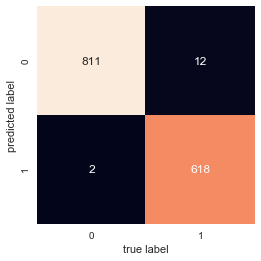

In [137]:
#Construct confusion matrix
confusion_m = confusion_matrix(yten_test, y_pred)
sns.set()
mat = confusion_matrix(yten_test, y_pred)
sns.heatmap(mat,square=True, annot=True,fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [138]:
# Accuracy Of Prediction
print("Accuracy:" + str(accuracy_score(yten_test,y_pred)))

Accuracy:0.990297990298


In [139]:
# Cross validation score of Prediction
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(yten_test, y_pred)
print("ROC AUC: {0}".format(roc_auc_score))

ROC AUC: 0.9910966958021401


### Random Forest Classifier 

In [79]:
#Fitting the model
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=10, random_state=42)
rf.fit(Xall_train, yall_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [80]:
rf.score(Xall_test, yall_test)

0.99306999306999311

In [81]:
feature_viewer = {}
for col, score in zip(X, rf.feature_importances_):
    feature_viewer[col] = score
pd.Series(feature_viewer)



age                        0.006175
sex                        0.000774
race                       0.001425
juv_fel_count              0.000621
decile_score               0.012293
juv_misd_count             0.001216
juv_other_count            0.001093
priors_count               0.012508
days_b_screening_arrest    0.004883
c_days_from_compas         0.002989
c_charge_degree            0.000856
is_recid                   0.434912
is_violent_recid           0.024039
score_text                 0.009375
v_decile_score             0.006211
v_score_text               0.003968
event                      0.198191
jail_dur                   0.005168
custody_dur                0.008995
length_of_sentence         0.264307
dtype: float64

In [82]:
sum(rf.feature_importances_)

1.0

In [83]:
sns.set()
mat = confusion_matrix(yall_test, rf.predict(Xall_test))

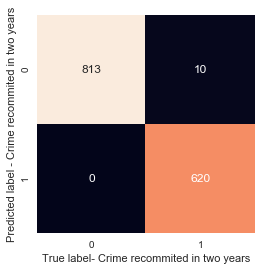

In [84]:
sns.heatmap(mat,square=True, annot=True,fmt='d', cbar=False)
plt.xlabel('True label- Crime recommited in two years')
plt.ylabel('Predicted label - Crime recommited in two years');


In [85]:
# Accuracy Of Prediction
print("Accuracy:" + str(accuracy_score(yall_test,y_pred)))

Accuracy:0.990297990298


In [86]:
# Cross validation score of Prediction
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(yall_test,rf.predict(Xall_test))
print("ROC AUC: {0}".format(roc_auc_score))


ROC AUC: 0.9939246658566221


### Feature viewer for Random forest

In [87]:
#Create dataframe for feature importance
out=pd.DataFrame.from_dict(feature_viewer, orient='index')

out.columns=(['feature_score'])
top_f=out.sort_values("feature_score",ascending=False)
top_f

,feature_score
is_recid,0.434912
length_of_sentence,0.264307
event,0.198191
is_violent_recid,0.024039
priors_count,0.012508
decile_score,0.012293
score_text,0.009375
custody_dur,0.008995
v_decile_score,0.006211
age,0.006175


Text(0.5,0,'Features')

Text(0,0.5,'feature_score')

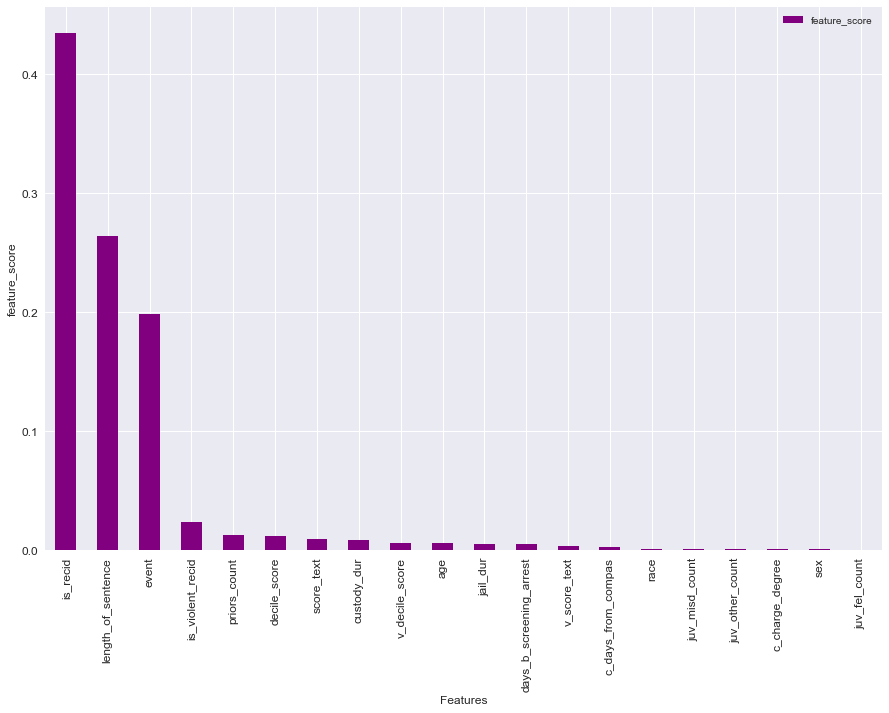

In [88]:
#Graph with feature importance score
ax = top_f.plot(kind='bar', figsize=(15, 10), legend=True, fontsize=12, color= 'purple')
Features = [top_f.index]
v2 = [top_f.columns]
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('feature_score', fontsize=12)
plt.show()

#### Feature Analysis :  the most influential features are is_recid, length_of_sentence, is_violent_recid,decile_score and event. The least influential were juvenile_felony_count (possibly) because it contained so few non-zero values) and charge degree, which is interesting because one might expect that a more serious charge degree to indicate a higher chance of recidivism. This indicates that criminal record is generally weighed more heavily than demographic information.

In [89]:
#Creating a new df to re apply random forest classifier with top 10 imp features
top_10=out.sort_values("feature_score",ascending=False).head(10)
top_10

,feature_score
is_recid,0.434912
length_of_sentence,0.264307
event,0.198191
is_violent_recid,0.024039
priors_count,0.012508
decile_score,0.012293
score_text,0.009375
custody_dur,0.008995
v_decile_score,0.006211
age,0.006175


Text(0.5,0,'Features')

Text(0,0.5,'feature_score')

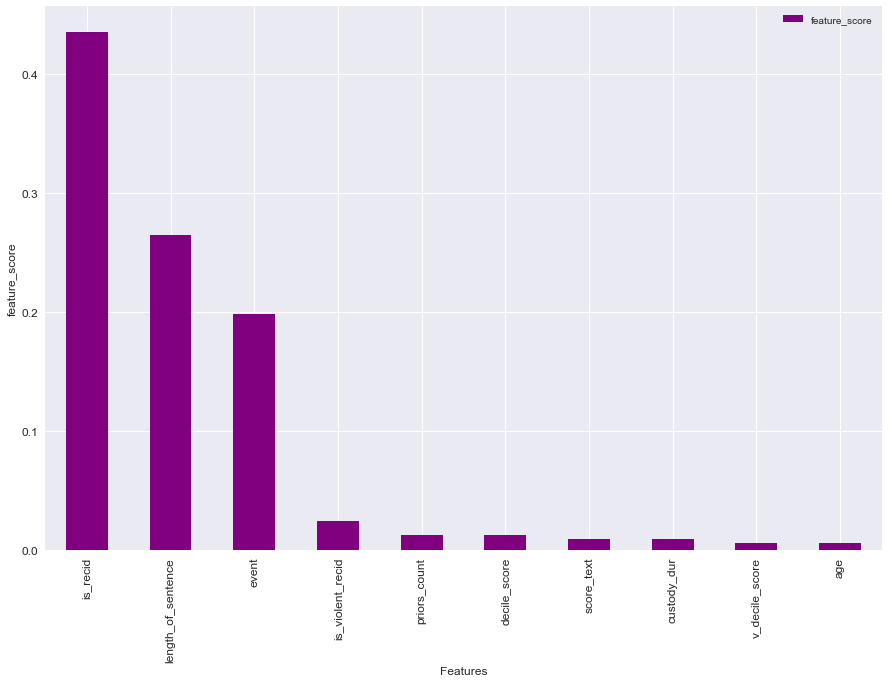

In [90]:
#Graph with top 10 best features
ax = top_10.plot(kind='bar', figsize=(15, 10), legend=True, fontsize=12, color= 'purple')
Features = [top_10.index]
v2 = [top_10.columns]
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('feature_score', fontsize=12)
plt.show()

In [91]:
df_topten = df[['is_recid','length_of_sentence','event','is_violent_recid','decile_score','score_text','priors_count','custody_dur','v_decile_score','age','two_year_recid']]

In [92]:
df_topten.head()

,is_recid,length_of_sentence,event,is_violent_recid,decile_score,score_text,priors_count,custody_dur,v_decile_score,age,two_year_recid
0,0,327,0,0,1,0.0,0,7.0,1,69,0
1,1,150,1,1,3,0.0,0,10.0,1,34,1
2,1,63,0,0,4,0.0,4,0.0,3,24,1
3,0,1174,0,0,8,1.0,1,0.0,6,23,0
4,0,1102,0,0,1,0.0,2,0.0,1,43,0


### Random Forest Classifier best 10 features

In [93]:
#Fitting the model
rf1 = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=10, random_state = 42)
rf1.fit(Xten_train, yten_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [94]:
sns.set()
mat1 = confusion_matrix(yten_test, rf1.predict(Xten_test))

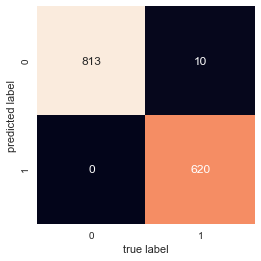

In [95]:
#Construct confusion matrix
sns.heatmap(mat1,square=True, annot=True,fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');


In [96]:
# Accuracy Of Prediction
rf1.score(Xten_test, yten_test)

0.99306999306999311

In [97]:
# Cross validation score of Prediction
from sklearn.metrics import roc_auc_score
roc_auc_score1 = roc_auc_score(yten_test,rf1.predict(Xten_test))
print("ROC AUC: {0}".format(roc_auc_score1))


ROC AUC: 0.9939246658566221


## KNN Classifier

In [98]:
from sklearn import metrics
#Fitting the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Xall_train, yall_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [99]:
#Predicting y values
pred_label = knn.predict(Xall_test)

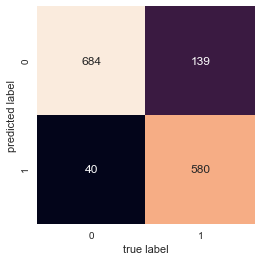

In [100]:
#Construct confusion matrix
confusion_m = confusion_matrix(yall_test, pred_label)
sns.set()
mat = confusion_matrix(yall_test, pred_label)
sns.heatmap(mat,square=True, annot=True,fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [101]:
# Accuracy Of Prediction
pred_label = knn.predict(Xall_test)
print("Accuracy:" + str(knn.score(Xall_test, yall_test)))

Accuracy:0.875952875953


In [102]:
# Cross validation score of Prediction
from sklearn.metrics import roc_auc_score
roc_auc_score2 = roc_auc_score(yall_test,pred_label)
print("ROC AUC: {0}".format(roc_auc_score2))


ROC AUC: 0.8832947908909183


### KNN for best  10 features

In [103]:
from sklearn import metrics
#Fitting the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Xten_train, yten_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [104]:
pred_label = knn.predict(Xten_test)

In [105]:
from sklearn.metrics import confusion_matrix

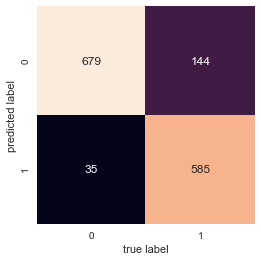

In [106]:
#Construct confusion matrix
confusion_m = confusion_matrix(yten_test, pred_label)
sns.set()
mat = confusion_matrix(yten_test, pred_label)
sns.heatmap(mat,square=True, annot=True,fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [107]:
# Accuracy Of Prediction
pred_label = knn.predict(Xten_test)
print("Accuracy:" + str(knn.score(Xten_test, yten_test)))

Accuracy:0.875952875953


In [108]:
from sklearn.metrics import roc_auc_score
roc_auc_score1 = roc_auc_score(yten_test,pred_label)
print("ROC AUC: {0}".format(roc_auc_score1))

ROC AUC: 0.8842893818837455


### XG BOOST

In [109]:
#Fitting the model
model = XGBClassifier()
model.fit(Xall_train, yall_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [110]:
y_pred3 = model.predict(Xall_test)
predictions = [round(value) for value in y_pred3]

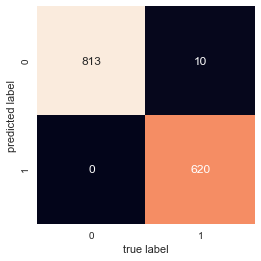

In [111]:
sns.set()
mat3 = confusion_matrix(yall_test, y_pred3)
sns.heatmap(mat3,square=True, annot=True,fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');


In [112]:
# Accuracy Of Prediction
accuracy = accuracy_score(yall_test, predictions)
print("Accuracy:" + str(accuracy))    

Accuracy:0.99306999307


In [113]:
# Cross validation score of Prediction
from sklearn.metrics import roc_auc_score
roc_auc_score3 = roc_auc_score(yall_test,y_pred3)
print("ROC AUC: {0}".format(roc_auc_score3))


ROC AUC: 0.9939246658566221


## XGBoost for best 10 features

In [114]:
#Fitting the model
model = XGBClassifier()
model.fit(Xten_train, yten_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [115]:
y_pred3 = model.predict(Xten_test)
predictions = [round(value) for value in y_pred3]

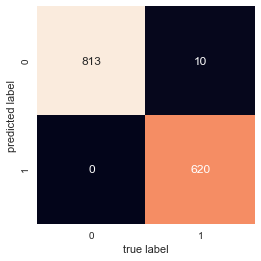

In [116]:
sns.set()
mat3 = confusion_matrix(yten_test, y_pred3)
sns.heatmap(mat3,square=True, annot=True,fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [117]:
# Accuracy Of Prediction
accuracy = accuracy_score(yten_test, predictions)
print("Accuracy:" + str(accuracy)) 

Accuracy:0.99306999307


In [118]:
# Cross validation score of Prediction
from sklearn.metrics import roc_auc_score
roc_auc_score3 = roc_auc_score(yten_test,y_pred3)
print("ROC AUC: {0}".format(roc_auc_score3))

ROC AUC: 0.9939246658566221


### Accuracy & ROC plots for all models

In [119]:
import pandas as pd

df_result = {'Model': ['Logistic Regression','Naïve Bayes','SVM','Random Forest','Xgboost','KNN'],
             'AllFeature_Accuracy': [0.9882, 0.979, 0.988,0.986, 0.993, 0.87],
             'AllFeature_ROC_AUC': [0.9886, 0.981, 0.989,0.993, 0.9939, 0.88],
             'TopFeature_Accuracy': [0.9902, 0.977, 0.99,0.993, 0.993, 0.87],
             'TopFeature_ROC_AUC': [0.991, 0.98, 0.99,0.993, 0.9939, 0.88]}

df_result = pd.DataFrame(df_result)

#### Normalization

In [120]:
norm_AllFeature_Accuracy = df_result.AllFeature_Accuracy / df_result.AllFeature_Accuracy[0]

In [121]:
norm_AllFeature_ROC_AUC = df_result.AllFeature_ROC_AUC / df_result.AllFeature_ROC_AUC[0]

In [122]:
norm_TopFeature_Accuracy = df_result.TopFeature_Accuracy / df_result.TopFeature_Accuracy[0]

In [123]:
norm_TopFeature_ROC_AUC = df_result.TopFeature_ROC_AUC / df_result.TopFeature_ROC_AUC[0]

#### Accuracy plot  For all Models with top 10 and all features

Text(0.5,0,'Models')

Text(0,0.5,'Feature Accuracy')

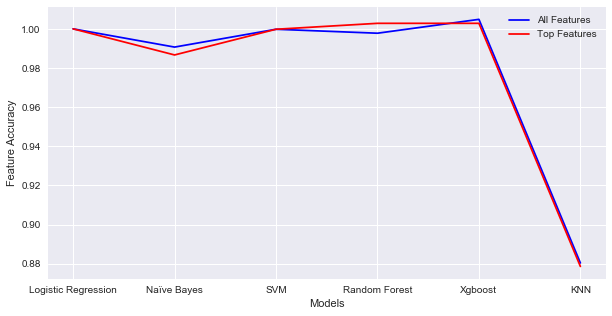

In [124]:
fig = plt.figure(figsize=(10,5))
x = df_result.Model
plt.xlabel('Models')
plt.ylabel('Feature Accuracy')
plt.plot(x, norm_AllFeature_Accuracy, '-b', label='All Features')
plt.plot(x, norm_TopFeature_Accuracy, '-r', label='Top Features')
plt.legend(loc='best')
plt.show(100)

#### ROC-AUC plot for all models with top 10 and all features

Text(0.5,0,'Models')

Text(0,0.5,'Feature ROC-AUC')

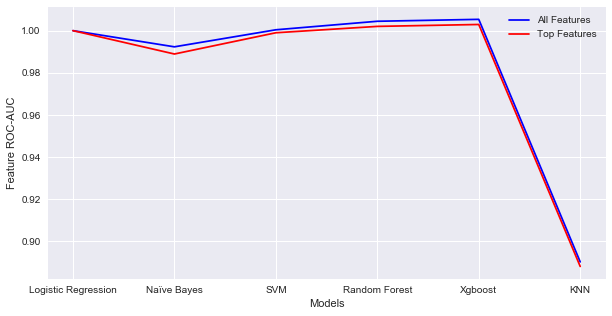

In [125]:
fig = plt.figure(figsize=(10,5))
x = df_result.Model
plt.xlabel('Models')
plt.ylabel('Feature ROC-AUC')
plt.plot(x, norm_AllFeature_ROC_AUC, '-b', label='All Features')
plt.plot(x, norm_TopFeature_ROC_AUC, '-r', label='Top Features')
plt.legend(loc='best')
plt.show(100)

In [126]:
df_confusion_matrix = {'Model': ['Logistic Regression','Naïve Bayes','SVM','SVM with PCA','Random Forest','KNN','XG Boost'],
             'Total_Correct_Prediction_all_features': [1426,1414,1411,1425,1433,1264,1433],
             'Total_False_Prediction_all_features': [17,29,32,18,10,179,10],
             'Total_Correct_Prediction_top_features': [1429,1411,1411,1423,1433,1264,1433],
             'Total_False_Prediction_top_features': [14,32,32,20,10,179,10]}

df_confusion_matrix = pd.DataFrame(df_confusion_matrix)

In [127]:
df_confusion_matrix.head()

,Model,Total_Correct_Prediction_all_features,Total_False_Prediction_all_features,Total_Correct_Prediction_top_features,Total_False_Prediction_top_features
0,Logistic Regression,1426,17,1429,14
1,Naïve Bayes,1414,29,1411,32
2,SVM,1411,32,1411,32
3,SVM with PCA,1425,18,1423,20
4,Random Forest,1433,10,1433,10


Text(0.5,0,'Models')

Text(0,0.5,'Total_Correct_Prediction_all_features')

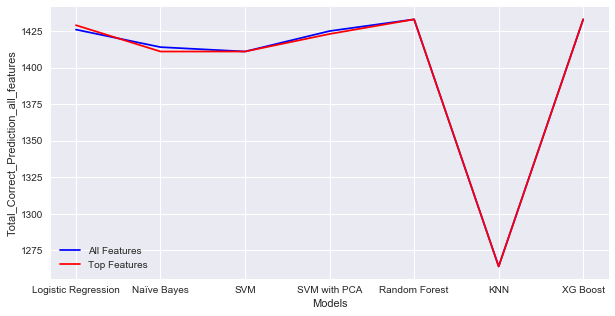

In [128]:
fig = plt.figure(figsize=(10,5))
x = df_confusion_matrix.Model
plt.xlabel('Models')
plt.ylabel('Total_Correct_Prediction_all_features')
plt.plot(x, df_confusion_matrix.Total_Correct_Prediction_all_features, '-b', label='All Features')
plt.plot(x, df_confusion_matrix.Total_Correct_Prediction_top_features, '-r', label='Top Features')
plt.legend(loc='best')
plt.show(100)

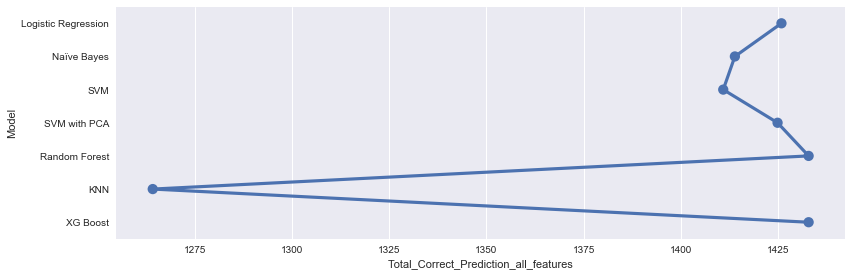

In [129]:
sns.factorplot(x='Total_Correct_Prediction_all_features',y='Model',data=df_confusion_matrix, aspect =3)

<BarContainer object of 7 artists>

<BarContainer object of 7 artists>

([<matplotlib.axis.XTick at 0x19abe664828>,
 <a list of 7 Text xticklabel objects>)

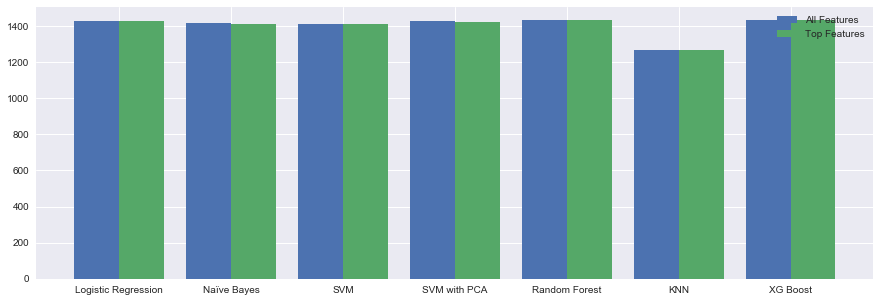

In [130]:
fig = plt.figure(figsize=(15,5))
X = df_confusion_matrix.Model
Y = df_confusion_matrix.Total_Correct_Prediction_all_features
Z = df_confusion_matrix.Total_Correct_Prediction_top_features
_X = np.arange(len(X)) 
plt.bar(_X - 0.2, Y, 0.4, label='All Features') 
plt.bar(_X + 0.2, Z, 0.4, label='Top Features') 
plt.legend(loc='best')
plt.xticks(_X, X) # set labels manually plt.show()

In [143]:
df_cmatrix = {'Model': ['Logistic Regression','Naïve Bayes','SVM', 'SVM RBF','Random Forest','Xgboost','KNN'],
             'AllFeatures_CorrectPred': [1426, 1414, 1411, 1057, 1433, 1264],
             'AllFeatures_IncorrectPred': [17, 29, 32, 386, 10, 179],
             'TopFeatures_CorrectPred': [1428, 1411, 1429,1058, 1433, 1264],
             'TopFeatures_IncorrectPred': [15, 32, 14, 10, 385, 10, 179]}

## Recommendation 

***Model Recommendation - Random Forest***
***Features Recommendation - Focus on features based on criminal records***

**What factors should actually be considered for predicting Recidivism and why?**

Factors such as demographic may serve as a proxy for race. Because these variables are highly correlated with race, they will likely have a racially disparate impact. As a public policy matter , we believe that "risk assessment" factors based on demographic background may not serve its intended goal of reducing incarcenation because they already have  racially disparate impact, which means that existing COMPAS algorithms produce higher risk estimates, all other things equal, for subgroups whose members are already disproportionately incarcenated. 